<a href="https://colab.research.google.com/github/pruthvipatel/machine_learning_final_project/blob/master/ML_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Masking, Embedding
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf

Using TensorFlow backend.


In [0]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Input, Dense, GRU, Embedding
from tensorflow.python.keras.optimizers import RMSprop
from tensorflow.python.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard, ReduceLROnPlateau

In [3]:

# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


    100% |████████████████████████████████| 993kB 20.9MB/s 


In [0]:

link='https://drive.google.com/open?id=14uXijKHqycIV5VHL4v2DhFwmteCNfUNj' #provide the link to csv that you uploaded on your google drive
fluff, id = link.split('=')
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('Processed_Data.csv')
df1 = pd.read_csv('Processed_Data.csv',parse_dates=[[0,1,2]])


In [5]:
print(df1.dtypes)
print(df1.shape)

Row Labels_Month_Year            datetime64[ns]
Average of DHI                          float64
Average of DNI                          float64
Average of GHI                          float64
Average of Clearsky DHI                 float64
Average of Clearsky DNI                 float64
Average of Clearsky GHI                 float64
Average of Cloud Type                   float64
Average of Dew Point                    float64
Average of Solar Zenith Angle           float64
Average of Fill Flag                    float64
Average of Surface Albedo               float64
Average of Wind Speed                   float64
Average of Precipitable Water           float64
Average of Wind Direction               float64
Average of Relative Humidity            float64
Average of Temperature                  float64
Average of Pressure                     float64
dtype: object
(7300, 18)


In [0]:
#df1.drop(columns=[df1.columns[18],df1.columns[19],df1.columns[20]],inplace=True)

In [0]:
df_dates=df1[df1.columns[0]].copy()
df1.drop(columns=[df1.columns[0]],inplace=True)

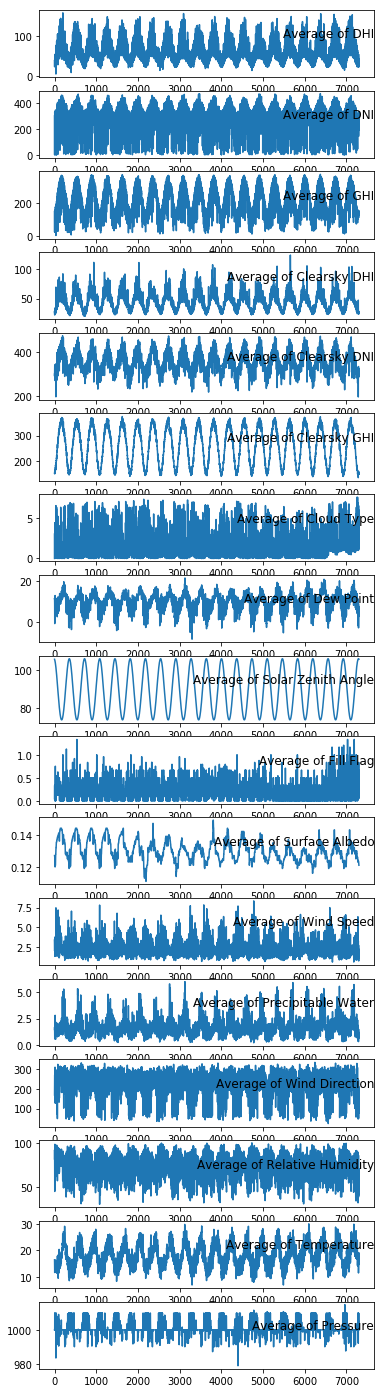

In [8]:
values = df1.values
# specify columns to plot
groups = range(17)
i = 1
# plot each column
plt.figure().set_figheight(25)
for group in groups:
	plt.subplot(len(groups), 1, i)
	plt.plot(values[:, group])
	plt.title(df1.columns[group], y=0.5, loc='right')
	i += 1
plt.show()

In [9]:
'''
#Normalizing the features
temp = df1[df1.columns[0]].copy()
temp=pd.DataFrame(temp)
temp = df1['Month_Day'].copy()
df1.drop(['Month_Day'],axis=1,inplace=True)
df1=((df1-df1.min())/(df1.max()-df1.min()))
df1.insert(0, column='Month_Day', value=temp.values)
'''

"\n#Normalizing the features\ntemp = df1[df1.columns[0]].copy()\ntemp=pd.DataFrame(temp)\ntemp = df1['Month_Day'].copy()\ndf1.drop(['Month_Day'],axis=1,inplace=True)\ndf1=((df1-df1.min())/(df1.max()-df1.min()))\ndf1.insert(0, column='Month_Day', value=temp.values)\n"

In [0]:
shift_steps=7
target_names=['Average of GHI']
df_targets=df1[target_names].shift(-shift_steps)

In [13]:
df_targets.tail()

,Average of GHI
7295,NaN
7296,NaN
7297,NaN
7298,NaN
7299,NaN


In [14]:
x_data=df1.values[0:-shift_steps]
print(x_data.shape)
y_data=df_targets.values[:-shift_steps]
print(y_data.shape)
tst_size=0.1


(7293, 17)
(7293, 1)


In [15]:
num_data = len(x_data)
num_data
train_split = 0.9
num_train = int(train_split * num_data)
num_train
num_test = num_data - num_train
num_test
x_trn = x_data[0:num_train]
x_tst = x_data[num_train:]
len(x_trn) + len(x_tst)


7293

In [16]:
y_trn = y_data[0:num_train]
y_tst = y_data[num_train:]
len(y_trn) + len(y_tst)

7293

In [17]:
num_x_signals = x_data.shape[1]
num_x_signals
num_y_signals = y_data.shape[1]
num_y_signals

1

In [0]:
#x_trn,x_tst,y_trn,y_tst=train_test_split(x_data, y_data, test_size=tst_size, random_state=42)
x_scaler=MinMaxScaler()

In [0]:
#x_trn_scaled=x_scaler.fit_transform(x_trn[:,1:])
x_trn_scaled=x_scaler.fit_transform(x_trn)

In [20]:
'''
temp=x_trn[:,0]
temp=np.reshape(temp,(temp.shape[0],-1))
print(x_trn_scaled.dtype)
x_trn_scaled = np.hstack((temp, x_trn_scaled))
print(x_trn_scaled.shape)
'''

'\ntemp=x_trn[:,0]\ntemp=np.reshape(temp,(temp.shape[0],-1))\nprint(x_trn_scaled.dtype)\nx_trn_scaled = np.hstack((temp, x_trn_scaled))\nprint(x_trn_scaled.shape)\n'

In [0]:

x_tst_scaled=x_scaler.transform(x_tst)

In [0]:
y_scaler = MinMaxScaler()
y_trn_scaled = y_scaler.fit_transform(y_trn)
y_tst_scaled = y_scaler.transform(y_tst)

In [23]:
print(y_trn_scaled.shape)
temp = (1000, 7, num_y_signals)
temp1 = np.zeros(shape=temp, dtype=np.float16)
print(temp1[1].shape)

(6563, 1)
(7, 1)


In [24]:
'''
x_tst_scaled = np.hstack((temp, x_tst_scaled))
print(x_tst_scaled.shape)
'''

'\nx_tst_scaled = np.hstack((temp, x_tst_scaled))\nprint(x_tst_scaled.shape)\n'

In [0]:
def batch_generator(batch_size, sequence_length):
    """
    Generator function for creating random batches of training-data.
    """

    # Infinite loop.
    while True:
        # Allocate a new array for the batch of input-signals.
        x_shape = (batch_size, sequence_length, num_x_signals)
        x_batch = np.zeros(shape=x_shape, dtype=np.float16)

        # Allocate a new array for the batch of output-signals.
        y_shape = (batch_size, sequence_length, num_y_signals)
        y_batch = np.zeros(shape=y_shape, dtype=np.float16)

        # Fill the batch with random sequences of data.
        for i in range(batch_size):
            # Get a random start-index.
            # This points somewhere into the training-data.
            idx = np.random.randint(num_train - sequence_length)
            
            # Copy the sequences of data starting at this index.
            x_batch[i] = x_trn_scaled[idx:idx+sequence_length]
            #y_batch[i] = y_trn_scaled[idx:idx+sequence_length]
            '''
            y_batch[i]=np.zeros((7,1))
            print(idx)
            print(sequence_length)
            print(y_trn_scaled[idx:idx+sequence_length].shape)
            '''
            
        yield (x_batch, y_batch)

In [0]:
batch_size = 150
sequence_length=7

In [0]:
generator = batch_generator(batch_size=batch_size,
                            sequence_length=sequence_length)

In [0]:
x_batch, y_batch = next(generator)

In [29]:
print(x_batch.shape)
print(y_batch.shape)

(150, 7, 17)
(150, 7, 1)


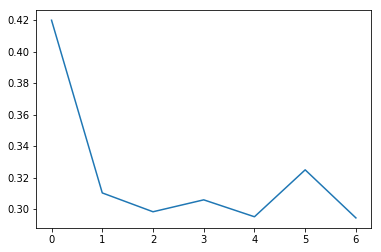

In [30]:
batch = 0   # First sequence in the batch.
signal = 0  # First signal from the 20 input-signals.
seq = x_batch[batch, :, signal]
plt.plot(seq)

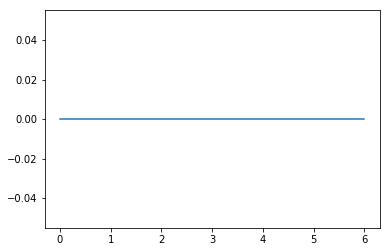

In [31]:
seq = y_batch[batch, :, signal]
plt.plot(seq)

In [0]:
validation_data = (np.expand_dims(x_tst_scaled, axis=0),
                   np.expand_dims(y_tst_scaled, axis=0))

In [0]:
model = Sequential()

In [34]:
model.add(GRU(units=512,
              return_sequences=True,
              input_shape=(None, num_x_signals,)))

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
model.add(Dense(num_y_signals, activation='sigmoid'))

In [0]:
if False:
    from tensorflow.python.keras.initializers import RandomUniform

    # Maybe use lower init-ranges.
    init = RandomUniform(minval=-0.05, maxval=0.05)

    model.add(Dense(num_y_signals,
                    activation='linear',
                    kernel_initializer=init))

In [0]:
warmup_steps = 50

In [0]:
def loss_mse_warmup(y_true, y_pred):
    """
    Calculate the Mean Squared Error between y_true and y_pred,
    but ignore the beginning "warmup" part of the sequences.
    
    y_true is the desired output.
    y_pred is the model's output.
    """

    # The shape of both input tensors are:
    # [batch_size, sequence_length, num_y_signals].

    # Ignore the "warmup" parts of the sequences
    # by taking slices of the tensors.
    y_true_slice = y_true[:, warmup_steps:, :]
    y_pred_slice = y_pred[:, warmup_steps:, :]

    # These sliced tensors both have this shape:
    # [batch_size, sequence_length - warmup_steps, num_y_signals]

    # Calculate the MSE loss for each value in these tensors.
    # This outputs a 3-rank tensor of the same shape.
    loss = tf.losses.mean_squared_error(labels=y_true_slice,
                                        predictions=y_pred_slice)

    # Keras may reduce this across the first axis (the batch)
    # but the semantics are unclear, so to be sure we use
    # the loss across the entire tensor, we reduce it to a
    # single scalar with the mean function.
    loss_mean = tf.reduce_mean(loss)

    return loss_mean

In [0]:
optimizer = RMSprop(lr=1e-3)

In [40]:
model.compile(loss=loss_mse_warmup, optimizer=optimizer)

Instructions for updating:
Use tf.cast instead.


In [41]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, None, 512)         814080    
_________________________________________________________________
dense (Dense)                (None, None, 1)           513       
Total params: 814,593
Trainable params: 814,593
Non-trainable params: 0
_________________________________________________________________


In [0]:
path_checkpoint = '23_checkpoint.keras'
callback_checkpoint = ModelCheckpoint(filepath=path_checkpoint,
                                      monitor='val_loss',
                                      verbose=1,
                                      save_weights_only=True,
                                      save_best_only=True)

In [0]:
callback_early_stopping = EarlyStopping(monitor='val_loss',
                                        patience=5, verbose=1)

In [0]:
callback_tensorboard = TensorBoard(log_dir='./23_logs/',
                                   histogram_freq=0,
                                   write_graph=False)

In [0]:
callback_reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                                       factor=0.1,
                                       min_lr=1e-4,
                                       patience=0,
                                       verbose=1)

In [0]:
callbacks = [callback_early_stopping,
             callback_checkpoint,
             callback_tensorboard,
             callback_reduce_lr]


In [0]:
#training the network
%%time
model.fit_generator(generator=generator,
                    epochs=20,
                    steps_per_epoch=100,
                    validation_data=validation_data,
                    callbacks=callbacks)

Epoch 1/20
1/1 [==============================] - 1s 873ms/sample - loss: nan

Epoch 00001: val_loss did not improve from inf

Epoch 00001: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
100/100 [==============================] - 24s 242ms/step - loss: 0.0000e+00 - val_loss: nan
Epoch 2/20
1/1 [==============================] - 1s 746ms/sample - loss: nan

Epoch 00002: val_loss did not improve from inf

Epoch 00002: ReduceLROnPlateau reducing learning rate to 0.0001.
100/100 [==============================] - 23s 229ms/step - loss: 0.0000e+00 - val_loss: nan
Epoch 3/20
 33/100 [========>.....................] - ETA: 14s - loss: 0.0000e+00

In [0]:
try:
    model.load_weights(path_checkpoint)
except Exception as error:
    print("Error trying to load checkpoint.")
    print(error)

In [0]:
result = model.evaluate(x=np.expand_dims(x_tst_scaled, axis=0),
                        y=np.expand_dims(y_tst_scaled, axis=0))

In [0]:
print("loss (test-set):", result)

In [0]:
#If you have several metrics you can use this instead.
if False:
    for res, metric in zip(result, model.metrics_names):
        print("{0}: {1:.3e}".format(metric, res))

In [0]:
def plot_comparison(start_idx, length=100, train=True):
    """
    Plot the predicted and true output-signals.
    
    :param start_idx: Start-index for the time-series.
    :param length: Sequence-length to process and plot.
    :param train: Boolean whether to use training- or test-set.
    """
    
    if train:
        # Use training-data.
        x = x_trn_scaled
        y_true = y_trn
    else:
        # Use test-data.
        x = x_tst_scaled
        y_true = y_tst
    
    # End-index for the sequences.
    end_idx = start_idx + length
    
    # Select the sequences from the given start-index and
    # of the given length.
    x = x[start_idx:end_idx]
    y_true = y_true[start_idx:end_idx]
    
    # Input-signals for the model.
    x = np.expand_dims(x, axis=0)

    # Use the model to predict the output-signals.
    y_pred = model.predict(x)
    
    # The output of the model is between 0 and 1.
    # Do an inverse map to get it back to the scale
    # of the original data-set.
    y_pred_rescaled = y_scaler.inverse_transform(y_pred[0])
    
    # For each output-signal.
    for signal in range(len(target_names)):
        # Get the output-signal predicted by the model.
        signal_pred = y_pred_rescaled[:, signal]
        
        # Get the true output-signal from the data-set.
        signal_true = y_true[:, signal]

        # Make the plotting-canvas bigger.
        plt.figure(figsize=(15,5))
        
        # Plot and compare the two signals.
        plt.plot(signal_true, label='true')
        plt.plot(signal_pred, label='pred')
        
        # Plot grey box for warmup-period.
        p = plt.axvspan(0, warmup_steps, facecolor='black', alpha=0.15)
        
        # Plot labels etc.
        plt.ylabel(target_names[signal])
        plt.legend()
        plt.show()

In [0]:
plot_comparison(start_idx=10, length=100, train=True)